## Import the dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

## Read the CSV file

In [2]:
df = pd.read_csv('/kaggle/input/top-classical-composers/classical_composers.csv', encoding='latin1')

## Let's start exploring the data

In [3]:
# check the shape of the data
df.shape

(101, 6)

In [4]:
df.head()

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,NaN


In [5]:
df.tail()

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
96,Manuel de Falla,Spanish,1876.0,1946.0,"El amor brujo, Noches en los jardines de España",23.0
97,Hildegard von Bingen,German,1098.0,1179.0,"Ordo Virtutum, Symphony of the Harmony of Cele...",NaN
98,Mikhail Glinka,Russian,1804.0,1857.0,"A Life for the Tsar, Ruslan and Ludmila",NaN
99,Alexander Glazunov,Russian,1865.0,1936.0,"The Seasons, Symphony No. 5",35.0
100,Don Carlo Gesualdo,Italian,1566.0,1613.0,"Madrigals, Tenebrae Responsories",NaN


In [6]:
# drop the first row as it's all nan values
df = df.drop(0, axis=0)

In [7]:
# check out the new shape of the dataframe
df.shape

(100, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Composer                         100 non-null    object 
 1     Nationality                    100 non-null    object 
 2    Born                            100 non-null    float64
 3   Died                             100 non-null    float64
 4   Biggest Piece                    100 non-null    object 
 5   Duration of Biggest Piece(mins)  64 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [9]:
df.isna().sum()

Composer                            0
  Nationality                       0
 Born                               0
Died                                0
Biggest Piece                       0
Duration of Biggest Piece(mins)    36
dtype: int64

Only **Duration of Biggest Piece(mins)** has null values in this dataset.

In [10]:
len(df['Composer'].unique()) == len(df)

True

This means that all the names mentioned in the **Composer** column are unique. This makes sense!

In [11]:
df.columns

Index(['Composer', '  Nationality ', ' Born', 'Died', 'Biggest Piece',
       'Duration of Biggest Piece(mins)'],
      dtype='object')

In [12]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['Composer', 'Nationality', 'Born', 'Died', 'Biggest Piece',
       'Duration of Biggest Piece(mins)'],
      dtype='object')

In [13]:
df['Nationality'].value_counts().sort_values(ascending=False)

Nationality
German            17
French            17
Italian           15
Russian           11
English           10
Austrian          10
American           5
Czech              3
Hungarian          2
Franco-Flemish     2
Spanish            2
Flemish            1
Norweigen          1
Belgian            1
Polish             1
Danish             1
Finnish            1
Name: count, dtype: int64

In [14]:
total_top_6 = df['Nationality'].value_counts()[:6].sum()
total_top_6

80

80 of the 100 composers in the dataset are from six nationalities - German, French, Italian, Russian, English and Austrian.

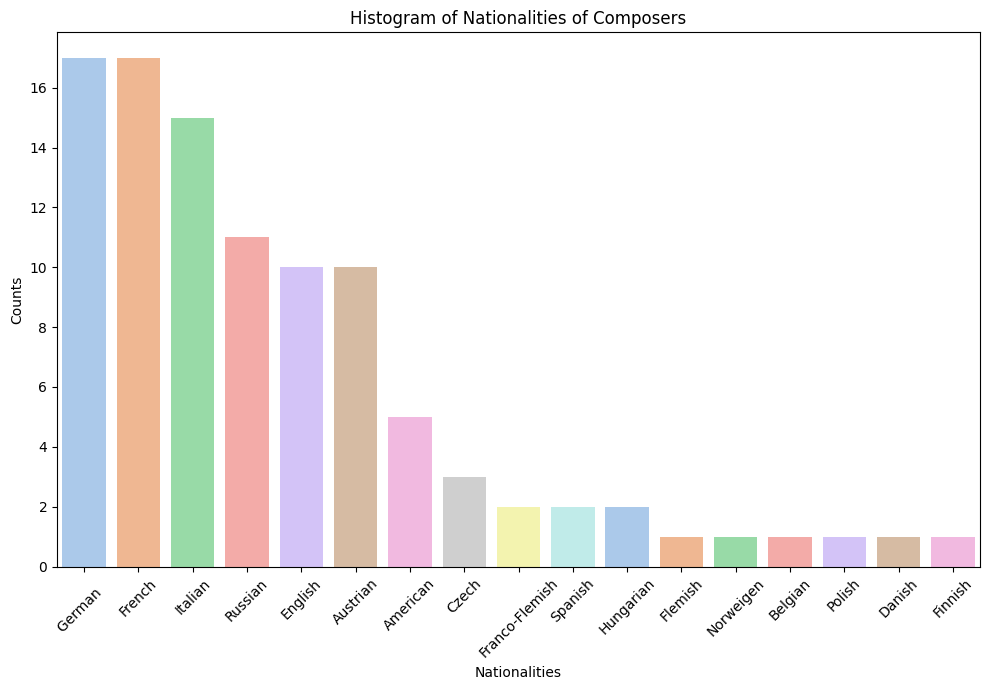

In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Nationality', order=df['Nationality'].value_counts().index, palette='pastel')
plt.title('Histogram of Nationalities of Composers')
plt.xlabel('Nationalities')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df['Born']

1      1770.0
2      1756.0
3      1685.0
4      1813.0
5      1732.0
        ...  
96     1876.0
97     1098.0
98     1804.0
99     1865.0
100    1566.0
Name: Born, Length: 100, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


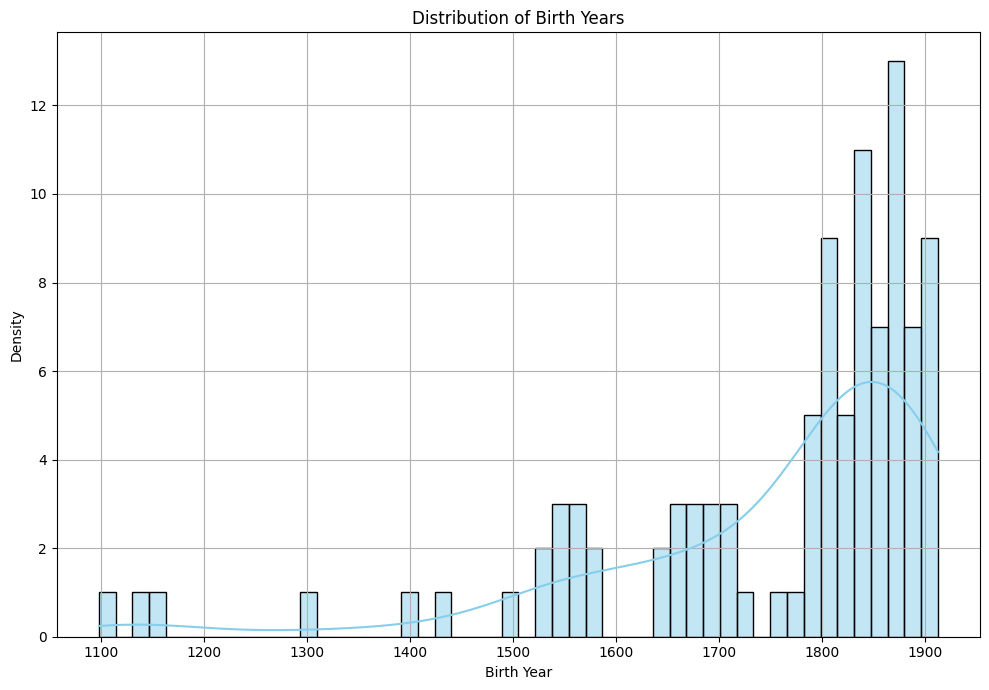

In [17]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Born', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
birth_year_skew = df['Born'].skew()
birth_year_kurtosis = df['Born'].kurtosis()

print(f'Skewness = {birth_year_skew}')
print(f'Kurtosis = {birth_year_kurtosis}')

Skewness = -1.9524173112387626
Kurtosis = 4.1355794732669064


- Skewness = -1.9524173112387626: This negative skewness indicates that the distribution is skewed to the left, meaning that the left tail is longer or there are more outliers on the left side of the distribution compared to the right side.

- Kurtosis = 4.1355794732669064: This positive kurtosis value indicates that the distribution has heavier tails and is more peaked than a normal distribution. It suggests that the distribution has more outliers and is more sharply peaked around the mean compared to a normal distribution, which has a kurtosis of 3.

Clearly, most of the composers were born in 1800-1900.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


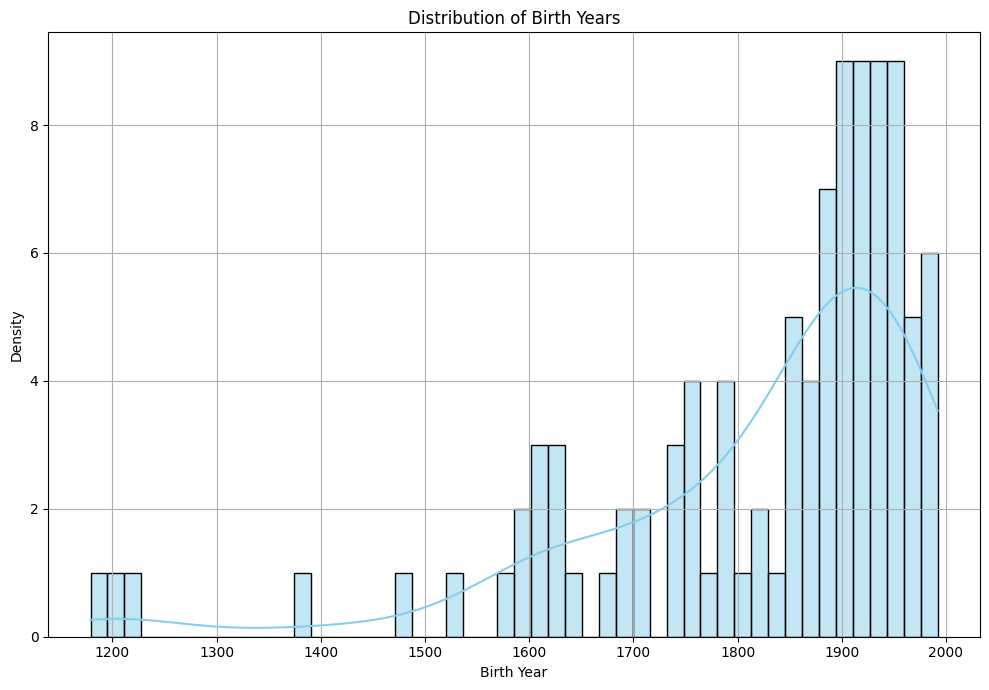

In [19]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Died', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot was expected to be similar to that of the previous plot.

In [20]:
print(df['Died'].skew())
print(df['Died'].kurtosis())

-1.861844045629341
3.864908734382507


These numbers confirm the above statement.

In [21]:
df.columns

Index(['Composer', 'Nationality', 'Born', 'Died', 'Biggest Piece',
       'Duration of Biggest Piece(mins)'],
      dtype='object')

In [22]:
df.head()

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
1,Ludwig van Beethoven,German,1770.0,1791.0,Symphony No. 9,65.0
2,Wolfgang Amadeus Mozart,Austrian,1756.0,1791.0,Symphony No.41,33.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
4,Richard Wagner,German,1813.0,1883.0,Der Ring des Nibelungen,NaN
5,Joseph Haydn,Austrian,1732.0,1809.0,Symphony No. 45,25.0


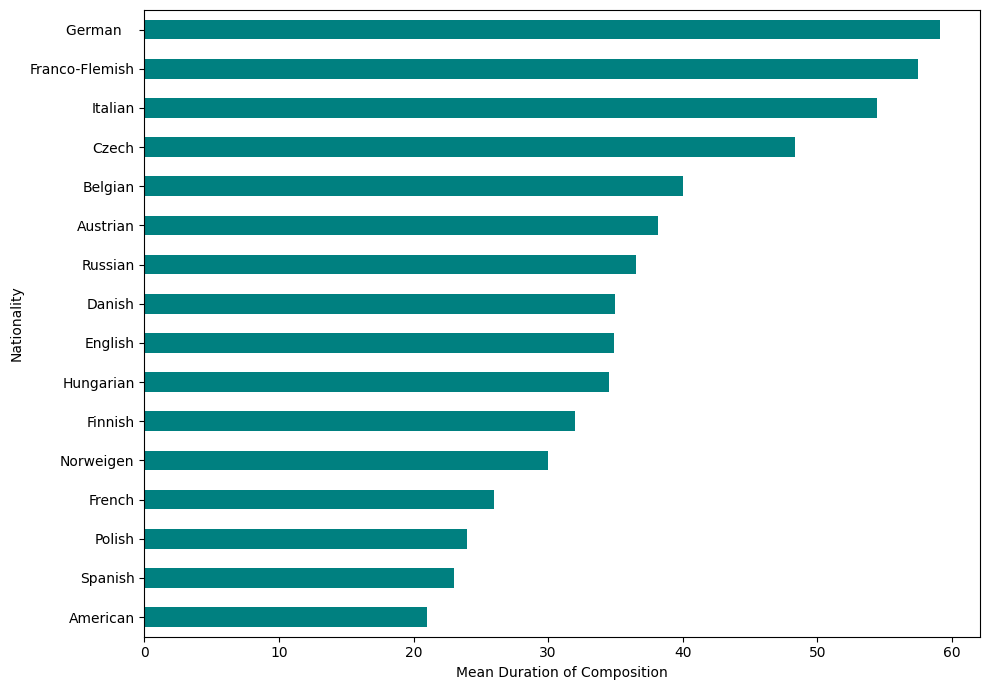

In [23]:
plt.figure(figsize=(10, 7))
df.groupby('Nationality')['Duration of Biggest Piece(mins)'].mean().dropna().sort_values(ascending=True).plot(kind='barh', color='teal')
plt.xlabel('Mean Duration of Composition')
plt.tight_layout()
plt.show()

In [24]:
# remove white spaces from the column values
df['Nationality'] = df['Nationality'].apply(lambda x: x.strip())
df['Nationality'].unique()

array(['German', 'Austrian', 'Russian', 'Polish', 'French', 'Hungarian',
       'Czech', 'Italian', 'Finnish', 'English', 'Flemish', 'Norweigen',
       'American', 'Belgian', 'Franco-Flemish', 'Danish', 'Spanish'],
      dtype=object)

## Composers with the longest duration of their biggest piece

In [25]:
df.sort_values(by='Duration of Biggest Piece(mins)', ascending=False)[:5]

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
27,Claudio Monteverdi,Italian,1567.0,1643.0,L'Orfeo,135.0
9,George Frideric Handel,German,1685.0,1759.0,Messiah,135.0
3,Johann Sebastian Bach,German,1685.0,1750.0,Mass in B minor,125.0
25,Anton Bruckner,Austrian,1824.0,1896.0,Symphony No. 8,80.0
62,Roland de Lassus,Franco-Flemish,1532.0,1594.0,Lagrime di San Pietro,75.0


## Composers with the shortest duration of their biggest piece

In [26]:
df.sort_values(by='Duration of Biggest Piece(mins)', ascending=True)[:5]

,Composer,Nationality,Born,Died,Biggest Piece,Duration of Biggest Piece(mins)
91,Orlando Gibbons,English,1583.0,1625.0,Hosanna to the Son of David,4.0
61,Anton Webern,Austrian,1883.0,1945.0,Five Pieces for Orchestra,7.0
53,Erik Satie,French,1866.0,1925.0,"Gymnopédies, Gnossiennes",7.0
93,Samuel Barber,American,1910.0,1981.0,"Adagio for Strings, Knoxville: Summer of 1915",8.0
90,Darius Milhaud,French,1892.0,1974.0,"Scaramouche, Le boeuf sur le toit",10.0
